/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 561, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 561, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 561, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 561, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,351 (599.03 KB)

 Trainable params: 153,223 (598.53 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.5121 - loss: 1.1108 - val_accuracy: 0.6296 - val_loss: 0.7401
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.7371 - loss: 0.5902 - val_accuracy: 0.7963 - val_loss: 0.4719
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - accuracy: 0.7855 - loss: 0.4944 - val_accuracy: 0.8162 - val_loss: 0.4387
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.7977 - loss: 0.4735 - val_accuracy: 0.8602 - val_loss: 0.3479
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8232 - loss: 0.4259 - val_accuracy: 0.8560 - val_loss: 0.3530
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.8499 - loss: 0.3864 - val_accuracy: 0.8750 - val_loss: 0.2960
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8617 - loss: 0.3369 - val_accuracy: 0.8833 - val_loss: 0.2980
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.8814 - loss: 0.3088 - val_accu

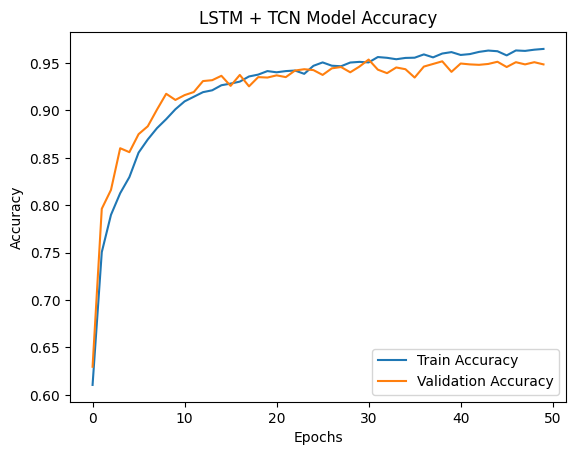

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

# Load and preprocess dataset
filepath = '/content/UCI_HAR_dataset_with_anomalies.csv'
df = load_data(filepath)

# Extract features and labels (assuming last column is the activity label)
X = df.iloc[:, :-1].values  # Sensor data
y = df.iloc[:, -1].values   # Activity labels

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize sensor data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for LSTM + TCN model
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, timesteps, features)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM + TCN Model
def create_lstm_tcn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.2),
        LSTM(128, return_sequences=True, dropout=0.2),
        LSTM(64, return_sequences=False, dropout=0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create model
model = create_lstm_tcn_model(input_shape=(X_train.shape[1], 1), num_classes=len(np.unique(y)))
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM + TCN Model Accuracy')
plt.show()
